In [4]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_stat.csv")

df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [5]:
df.Pos.value_counts()

Pos
SG    50
C     50
Name: count, dtype: int64

Text(0.5, 1.0, 'STL and 2P in 2d plane')

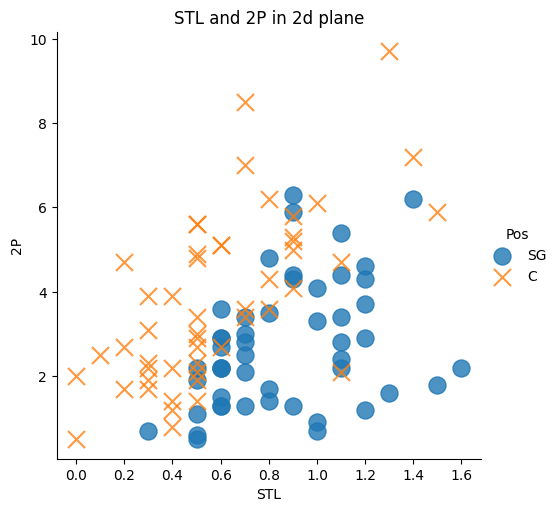

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.lmplot(x='STL', y='2P', data=df, fit_reg=False, scatter_kws={"s": 150},
           markers=['o', 'x'],
           hue="Pos")

plt.title('STL and 2P in 2d plane')

Text(0.5, 1.0, 'STL and 2P in 2d plane')

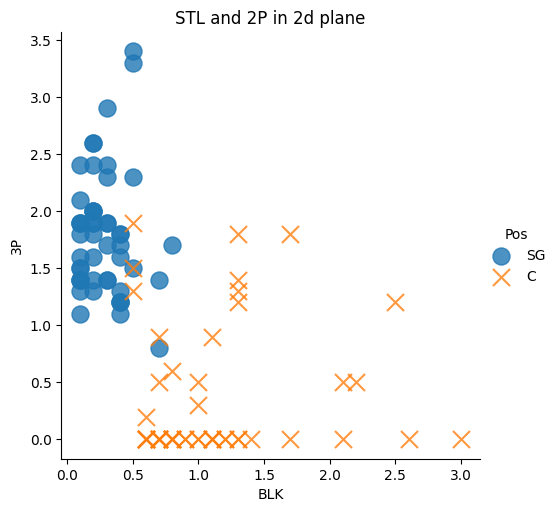

In [7]:

sns.lmplot(x='BLK', y='3P', data=df, fit_reg=False, scatter_kws={"s": 150},
           markers=['o', 'x'],
           hue="Pos")

plt.title('STL and 2P in 2d plane')

In [8]:
df.drop(['2P', 'AST', 'STL'], axis=1, inplace=True)
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


In [9]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

print(train.shape[0])
print(test.shape[0])

80
20


In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

max_k_range = train.shape[0] // 2
k_list = []
for i in range(3, max_k_range):
    k_list.append(i)
    
cross_validation_scores = []
x_train = train[['3P', 'BLK', 'TRB']]
y_train = train[['Pos']]

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
    cross_validation_scores.append(scores.mean())

cross_validation_scores

[np.float64(0.9125),
 np.float64(0.9125),
 np.float64(0.9375),
 np.float64(0.9375),
 np.float64(0.9125),
 np.float64(0.9375),
 np.float64(0.925),
 np.float64(0.925),
 np.float64(0.925),
 np.float64(0.925),
 np.float64(0.925),
 np.float64(0.925),
 np.float64(0.925),
 np.float64(0.925),
 np.float64(0.925),
 np.float64(0.925),
 np.float64(0.9125),
 np.float64(0.9125),
 np.float64(0.9),
 np.float64(0.9),
 np.float64(0.9),
 np.float64(0.9),
 np.float64(0.8625),
 np.float64(0.8625),
 np.float64(0.8625),
 np.float64(0.8625),
 np.float64(0.8625),
 np.float64(0.8625),
 np.float64(0.85),
 np.float64(0.85),
 np.float64(0.85),
 np.float64(0.85),
 np.float64(0.85),
 np.float64(0.85),
 np.float64(0.85),
 np.float64(0.85),
 np.float64(0.8375)]

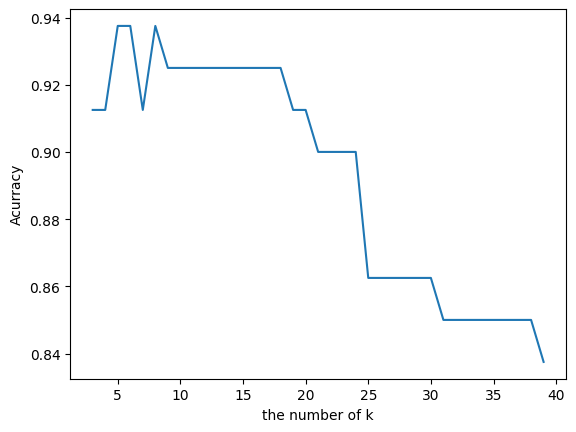

In [11]:
plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Acurracy')

plt.show()

In [12]:
k = k_list[cross_validation_scores.index(max(cross_validation_scores))]
print('The best number of k :', str(k))

The best number of k : 5


In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=k)

x_train = train[['3P', 'BLK', 'TRB']]
y_train = train[['Pos']]

knn.fit(x_train, y_train.values.ravel())

x_test = test[['3P', 'BLK', 'TRB']]
y_test = test[['Pos']]

pred = knn.predict(x_test)

print('Accuracy :', str(accuracy_score(y_test.values.ravel(), pred)))

Accuracy : 0.85


In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import numpy as np

def svc_param_selection(X_train, y_train, nfolds):
    svm_parameters = [
        {'kernel' : ['rbf'],
         'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
         'C':[0.01, 0.1, 1, 10, 100, 1000]}
    ]
    
    clf = GridSearchCV(SVC(), svm_parameters, cv=nfolds)
    clf.fit(X_train, y_train.values.ravel())
    print(clf.best_params_)

    return clf

x_train = train[['3P', 'BLK']]
y_train = train[['Pos']]

clf = svc_param_selection(x_train, y_train.values.ravel(), 10)


AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [16]:
C_candidates = []
C_candidates.append(clf.best_params_['C'] * 0.01)   
C_candidates.append(clf.best_params_['C'])
C_candidates.append(clf.best_params_['C'] * 100)

gamma_candidates = []
gamma_candidates.append(clf.best_params_['gamma'] * 0.01)
gamma_candidates.append(clf.best_params_['gamma'])
gamma_candidates.append(clf.best_params_['gamma'] * 100)    

X = train[['3P', 'BLK']]
Y = train['Pos'].tolist()

position = []
for gt in Y:
    if gt == 'C':
        position.append(0)
    else:
        position.append(1)
        
clasifiers = []

for C in C_candidates:
    for gamma in gamma_candidates:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X, Y)
        clasifiers.append((C, gamma, clf))  

plt.figure(figsize=(18, 18))
xx, yy = np.meshgrid(np.linspace(0, 4, 100), np.linspace(0, 4, 100))

for (k, (C, gamma, clf)) in enumerate(clasifiers):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape) 
    
plt.subplot(len(C_candidates), len(gamma_candidates), k + 1)
plt.title("gamma=10^%d, C=10^%10d" % (np.log10(gamma), np.log10(C)), size='medium')

plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
plt.scatter(X['3P'], X['BLK'], c=position, cmap=plt.cm.RdBu_r,
            edgecolors='k')

AttributeError: 'SVC' object has no attribute 'best_params_'